<a href="https://colab.research.google.com/github/DurgaManiPothula/SOC/blob/main/DLLAB10_Multiclass_Classification_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
from keras.datasets import reuters
from keras import models,layers
from keras.utils import to_categorical

In [25]:
(train_x,train_y),(test_x,test_y)= reuters.load_data(num_words=10000)

import numpy as np
from keras.utils import to_categorical

def OneHotEncoding_fn(ReutersData, dimension=10000):
    # 8982 x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(ReutersData), dimension))
    for i, sequence in enumerate(ReutersData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data

x_train = OneHotEncoding_fn(train_x)
x_test = OneHotEncoding_fn(test_x)

y_train = to_categorical(train_y)
y_test = to_categorical(test_y)


In [26]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:

from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:800]
X_train_without_val = x_train[800:]
y_validation = y_train[:800]
y_train_without_val = y_train[800:]


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))

Epoch 1/25
16/16 [==============================] - 2s 68ms/step - loss: 2.7197 - categorical_accuracy: 0.5171 - val_loss: 1.8140 - val_categorical_accuracy: 0.6313
Epoch 2/25
16/16 [==============================] - 1s 83ms/step - loss: 1.5408 - categorical_accuracy: 0.6793 - val_loss: 1.3617 - val_categorical_accuracy: 0.7013
Epoch 3/25
16/16 [==============================] - 1s 89ms/step - loss: 1.1857 - categorical_accuracy: 0.7400 - val_loss: 1.1877 - val_categorical_accuracy: 0.7487
Epoch 4/25
16/16 [==============================] - 1s 60ms/step - loss: 0.9694 - categorical_accuracy: 0.7900 - val_loss: 1.0882 - val_categorical_accuracy: 0.7675
Epoch 5/25
16/16 [==============================] - 1s 49ms/step - loss: 0.8047 - categorical_accuracy: 0.8245 - val_loss: 1.0122 - val_categorical_accuracy: 0.7812
Epoch 6/25
16/16 [==============================] - 1s 49ms/step - loss: 0.6766 - categorical_accuracy: 0.8543 - val_loss: 0.9756 - val_categorical_accuracy: 0.7950
Epoch 7/25

In [19]:
from keras import optimizers,metrics,losses


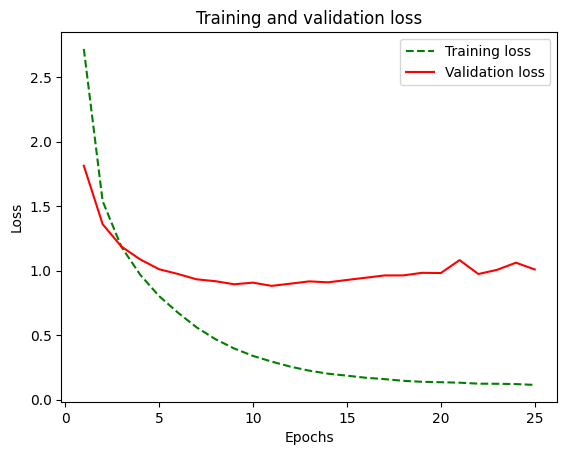

In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

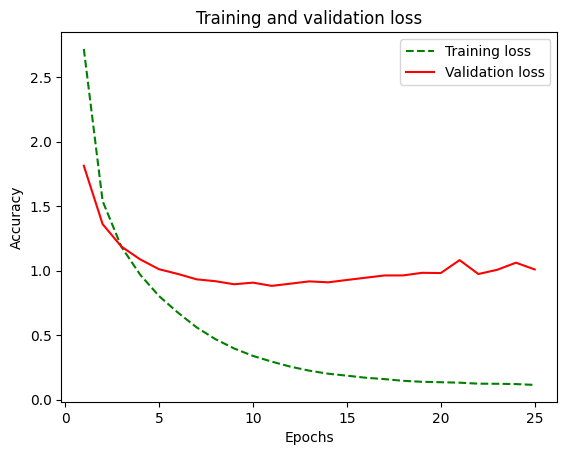

In [29]:
plt.clf()
acc = history_dict['loss']
acc = history_dict['val_loss']

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()